# To-do: 
- Based on the above, we need to remove the names of the co-hosts from the list of words that show up!

## Load in Data

### Read in the total list of data files

In [3]:
#import libraries
import glob 
import os
import matplotlib.pyplot as plt

#step 1: get a list of file names to read into the dataset
repo_path = os.path.dirname(os.getcwd()) #get the correct file path 
rm_paths = glob.glob(repo_path + "/data/01-raw/rachel_maddow/*.txt") #the paths for the rachel maddow transcript files
ac_paths = glob.glob(repo_path + "/data/01-raw/anderson_cooper/*.txt") #the paths for the anderson cooper transcript files

all_liberal_files = rm_paths + ac_paths


### Read in text of transcript files

In [9]:
raw_text = [] #create a container to hold the datafiles 

#step 2: read in each transcript as its own string and append to the list of raw documents
for transcript in all_liberal_files:
    text = open(transcript).read()
    raw_text.append(text)



In [12]:
print("Our liberal news corpus consists of {:,} total transcripts, sourced from Anderson Cooper 360 and the Rachel Maddow Show.".format(len(raw_text)))

Our liberal news corpus consists of 1,099 total transcripts, sourced from Anderson Cooper 360 and the Rachel Maddow Show.


## Data Pre-Processing

### Spacy Implementation & Removal of Stop Words 
This analysis is useful if we want more control over the corpus of stop words that are used in our analysis

In [ ]:
#Compare spacy implemtation to the sklearn #loads spacy and turns off some aspects 
# import spacy
# nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])


## Word- Frequency Analysis

### Use CountVectorizer to get the unique vocabulary list and eliminate stop words



In [28]:
#import the required package for the tfidf vector
from sklearn.feature_extraction.text import CountVectorizer

#step 1: set up the tfidf vectorizer
vectorizer = CountVectorizer(min_df=50, stop_words="english", max_df=0.8) #update/justify using these settings 
 
#step 2: apply the vectorizer to the corpus of documents (& store in document matrix X )
X = vectorizer.fit(raw_text) #should we use just .fit or .fit_transform? The latter actually results in the creation of a matrix object (where # of cols = # of words in the vocab)

#step 3: print out the vocabulary found by the tfid object
print("There are {:,} unique words in the vocabulary.".format(len(X.vocabulary_)))

There are 5,291 unique words in the vocabulary.


In [40]:
#check to see if "covid is in the dictioanary"
vocab = X.vocabulary_

vocab['covid'] #results in an index of 1197) 
#Note: this is NOT equivalent to the number of times covid appears in the documents
# the number below is solely an index value

1197

### Get a Word-Frequency Table from CountVectorizer
   Note: need to double-check how the counts are arrived at - is it by document or number of occurences in a given document?

In [42]:
X_transformed = vectorizer.fit_transform(raw_text)


In [54]:
array_of_words = vectorizer.get_feature_names_out()
array_of_words

array(['01', '02', '03', ..., 'zero', 'zone', 'zoom'], dtype=object)

In [55]:
array_of_counts = X_transformed.toarray().sum(axis=0) #sum the number of occurences of a word across the entire liberal corpus
array_of_counts

array([448, 447, 407, ..., 497, 304,  84])

In [58]:
word_frequency_dictionary = dict(zip(array_of_words,array_of_counts))

### Plot the Top 10 Most Frequency Occuring Words

In [65]:
from operator import itemgetter

#set the number of top words to see
num_top_words = 10

top_10_words = dict(sorted(word_frequency_dictionary.items(), key = itemgetter(1), reverse = True)[:num_top_words])

print(top_10_words)


{'cooper': 24014, 'election': 11390, 'cnn': 10025, 'maddow': 8802, 'anderson': 8018, 'covid': 7075, 'republicans': 6367, 'dr': 5857, 'voice': 5677, 'justice': 5670}


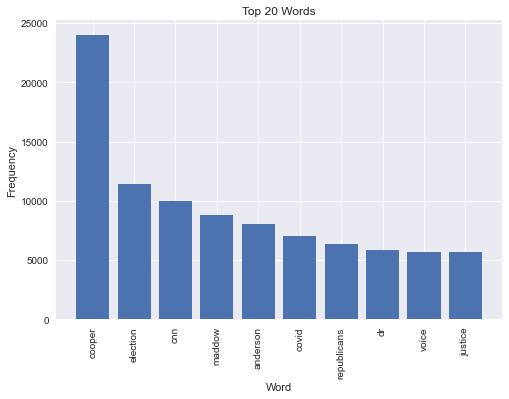

In [66]:
plt.style.use('seaborn')  

x = top_10_words.keys()
y = top_10_words.values()
plt.bar(x,y)
plt.xlabel('Word')
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.title('Top 20 Words')

plt.show()

In [26]:
# total_unique_words = X.vocabulary_ #, key=lambda d: d[1]) 

# total_unique_words
#X.vocabulary_

{'advisor': 226,
 'russia': 4158,
 'hill': 2265,
 'book': 658,
 'thousands': 4802,
 'join': 2599,
 'nationwide': 3128,
 'protests': 3739,
 'support': 4648,
 'abortion': 131,
 'rights': 4095,
 'oil': 3258,
 'beach': 564,
 'southern': 4444,
 'california': 753,
 'transcriptchris': 4882,
 'hayes': 2218,
 'msnbc': 3103,
 'room': 4133,
 'missing': 3049,
 'inaudible': 2404,
 'man': 2900,
 'ali': 290,
 'velshi': 5066,
 'rest': 4056,
 'chris': 893,
 'hour': 2321,
 'rachel': 3806,
 'january': 2580,
 'attack': 466,
 'capitol': 778,
 'amid': 320,
 'emerged': 1635,
 'certain': 832,
 'moments': 3073,
 'images': 2370,
 'burned': 737,
 'minds': 3028,
 'stars': 4511,
 'letters': 2772,
 'steps': 4535,
 'police': 3530,
 'close': 946,
 'range': 3831,
 'runs': 4153,
 'officers': 3251,
 'siege': 4353,
 'guy': 2182,
 'insurrection': 2491,
 'arrested': 420,
 'fbi': 1873,
 'face': 1821,
 'identified': 2351,
 'despite': 1406,
 'couldn': 1174,
 'miss': 3045,
 'online': 3270,
 'hours': 2322,
 'footage': 1980,
 'f

## Co-Occurence Analysis

In [ ]:
# placeholder = 
#Goal = do separate analysis for the conservative and liberal news sources and 

#load in the text files from rachel maddow and from anderson cooper

## Topic Modeling

## Sentiment Analysis